
The data likely represents historical advertising expenditure and sales data for a particular product or company.
There's an assumption that advertising expenditure on these three media channels (TV, Newspaper, Radio) might influence sales

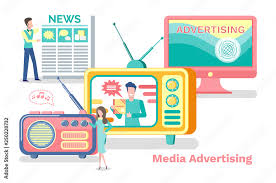

**Load and read data **

In [ ]:
import pandas as pd
data=pd.read_csv("advertising.csv")
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Text(0.5, 1.0, 'plot for Sales column')

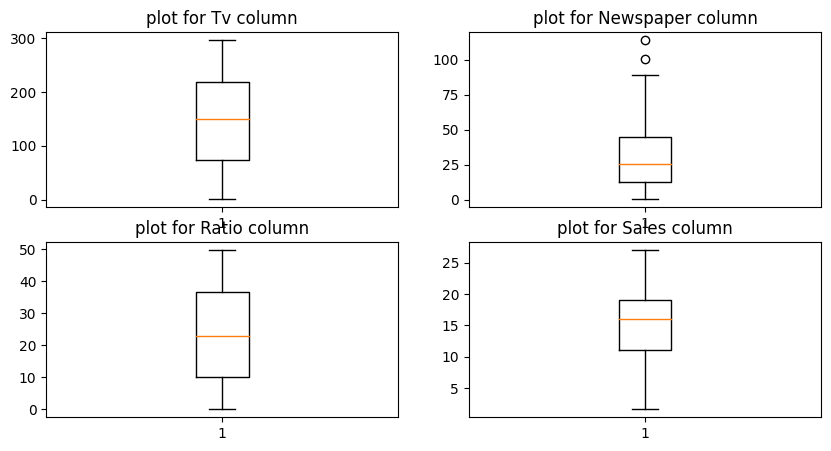

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(10,5))
ax1.boxplot(data.TV)
ax2.boxplot(data.Newspaper)
ax3.boxplot(data.Radio)
ax4.boxplot(data.Sales)
ax1.set_title("plot for Tv column")
ax2.set_title("plot for Newspaper column")
ax3.set_title("plot for Ratio column")
ax4.set_title("plot for Sales column")

In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
data.TV.var()

7370.94989321608

In [ ]:
data.Newspaper.var()

474.3083256281407

In [ ]:
data.Radio.var()

220.42774271356782

In [ ]:
data.Sales.var()

27.919517336683416

<ipython-input-84-942d769d1202>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.TV,kde=True )


<Axes: xlabel='TV', ylabel='Density'>

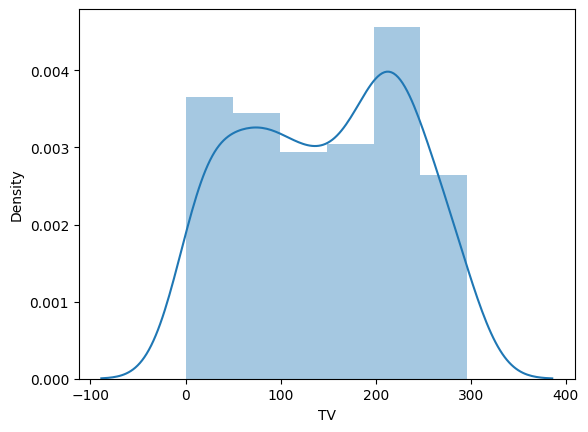

In [ ]:
sns.distplot(data.TV,kde=True )

Text(0.5, 1.0, 'Box-Cox Transformation ')

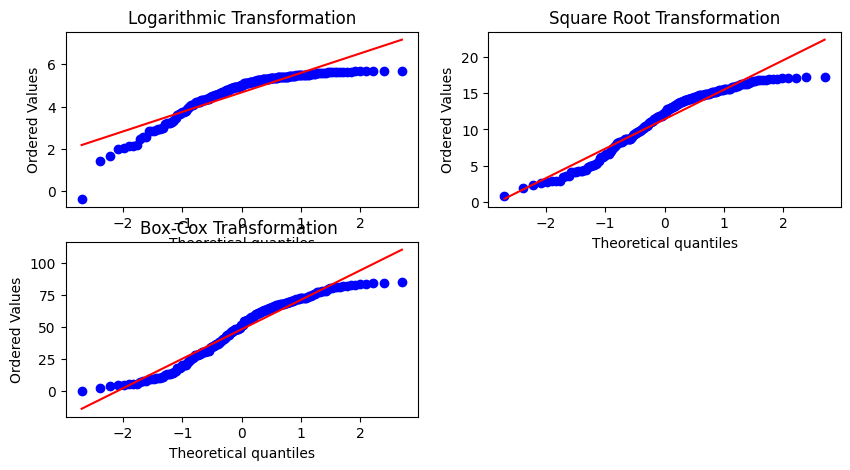

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt



# Perform a logarithmic transformation
log_data_TV = np.log(data.TV)

# Perform a square root transformation
sqrt_data_TV = np.sqrt(data.TV)

# Perform a Box-Cox transformation
boxcox_data_TV, lambda_value = stats.boxcox(data.TV)

# Create a QQ plot for each transformation
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
stats.probplot(log_data_TV, dist="norm", plot=plt)
plt.title("Logarithmic Transformation")

plt.subplot(2, 2, 2)
stats.probplot(sqrt_data_TV, dist="norm", plot=plt)
plt.title("Square Root Transformation")

plt.subplot(2, 2, 3)
stats.probplot(boxcox_data_TV, dist="norm", plot=plt)
plt.title("Box-Cox Transformation ")

Text(0.5, 1.0, 'Box-Cox Transformation ')

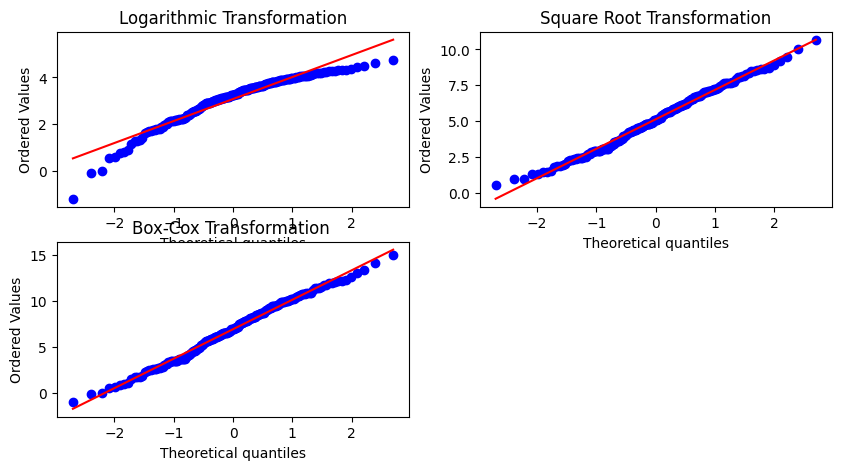

In [ ]:
# Perform a logarithmic transformation
log_data_N = np.log(data.Newspaper)

# Perform a square root transformation
sqrt_data_N = np.sqrt(data.Newspaper)

# Perform a Box-Cox transformation
boxcox_data_N, lambda_value = stats.boxcox(data.Newspaper)

# Create a QQ plot for each transformation
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
stats.probplot(log_data_N, dist="norm", plot=plt)
plt.title("Logarithmic Transformation")

plt.subplot(2, 2, 2)
stats.probplot(sqrt_data_N, dist="norm", plot=plt)
plt.title("Square Root Transformation")

plt.subplot(2, 2, 3)
stats.probplot(boxcox_data_N, dist="norm", plot=plt)
plt.title("Box-Cox Transformation ")

In [ ]:
sk=[]
for i in data.columns:
    sk.append(data[i].skew())
sk


[-0.06985336213274573,
 0.09417463149664404,
 0.8947204074986175,
 -0.07373923537186912]

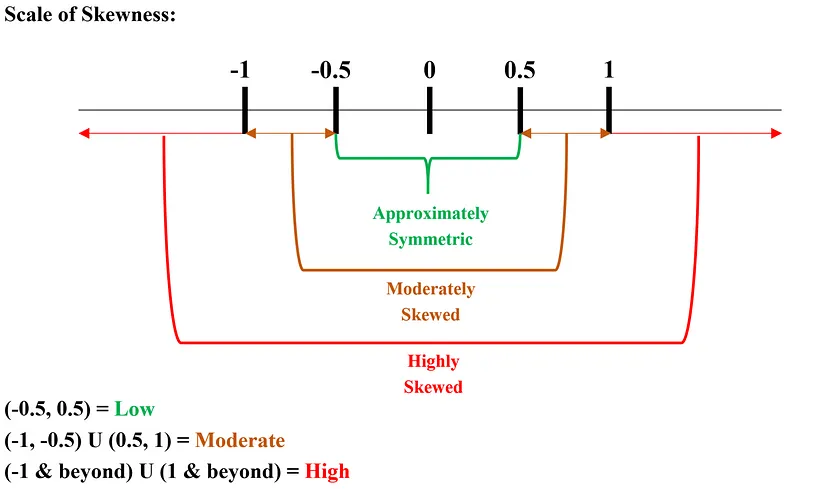

In [ ]:
stat,p=stats.shapiro(log_data_N)
alpha=0.05
if p < alpha:
    print("The data is not normally distributed.")
else:
    print("The data may be normally distributed.")

The data is not normally distributed.


In [ ]:
stat,p= stats.jarque_bera(boxcox_data_TV)
alpha=0.05
if p < alpha:
    print("The data is not normally distributed.")
else:
    print("The data may be normally distributed.")

The data is not normally distributed.


In [ ]:
print("Jarque-Bera test statistic:", stat)
print("Jarque-Bera test p-value:", p)

Jarque-Bera test statistic: 13.021085398140785
Jarque-Bera test p-value: 0.001487672145653001


Text(0.5, 1.0, 'Logarithmic Transformation')

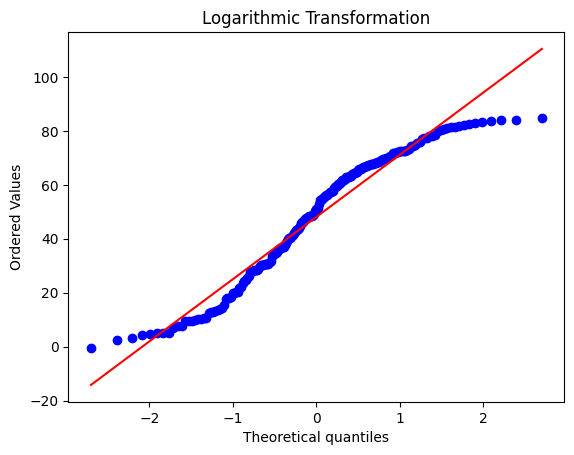

In [ ]:
data.TV,lam=stats.boxcox(data.TV)
stats.probplot(data.TV, dist="norm", plot=plt)
plt.title("Logarithmic Transformation")

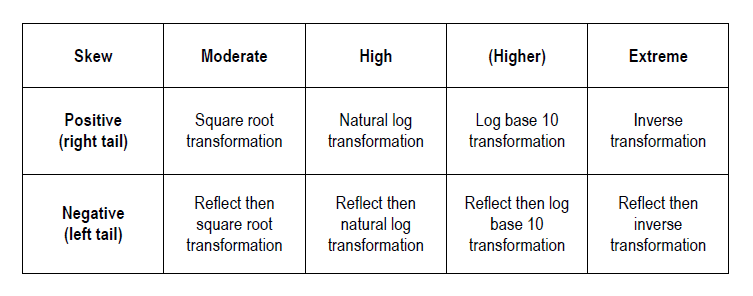

In [ ]:
neg=[]
for i in data.columns:
  if(np.any(data[i]<=0)):
    neg.append(True)
  else:
    neg.append(False)


In [ ]:
neg

[True, True, False, False]

In [ ]:
data.columns


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
from sklearn.preprocessing import QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal', n_quantiles=500)
data_transformed=quantile_transformer.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2764: UserWarning: n_quantiles (500) is greater than the total number of samples (200). n_quantiles is set to n_samples.
  warnings.warn(


In [ ]:
data_transformed = pd.DataFrame(data_transformed)

In [ ]:
data_transformed.columns

RangeIndex(start=0, stop=4, step=1)

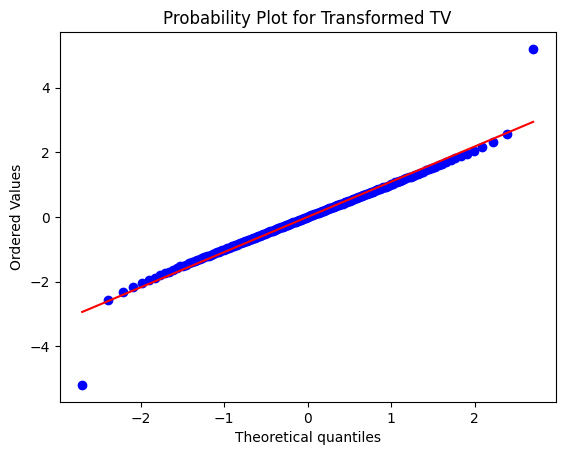

In [ ]:
stats.probplot(data_transformed[0], dist="norm", plot=plt)
plt.title("Probability Plot for Transformed TV")
plt.show()

<Axes: xlabel='0', ylabel='Density'>

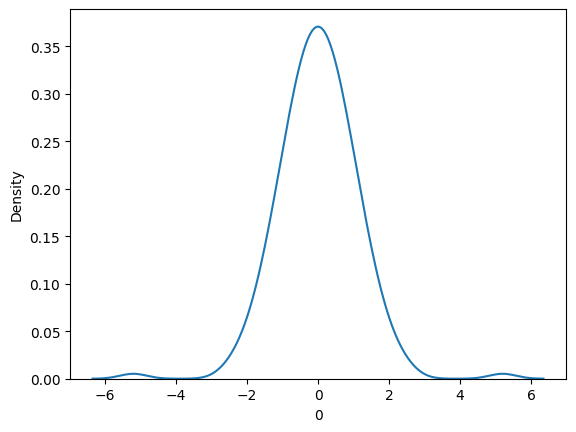

In [ ]:
sns.kdeplot(data_transformed[0])


<Axes: xlabel='1', ylabel='Density'>

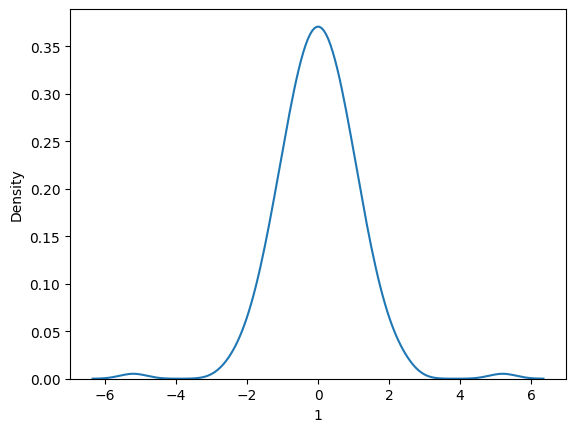

In [ ]:
sns.kdeplot(data_transformed[1])


<Axes: xlabel='2', ylabel='Density'>

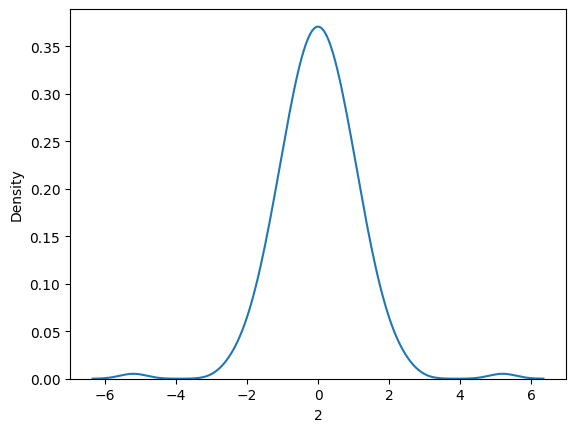

In [ ]:
sns.kdeplot(data_transformed[2])


<Axes: xlabel='3', ylabel='Density'>

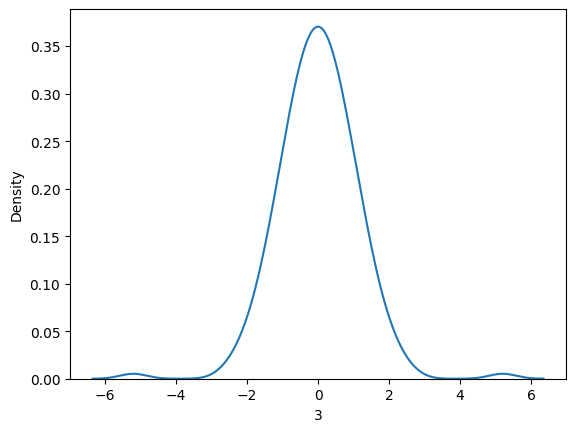

In [ ]:
sns.kdeplot(data_transformed[3])

In [ ]:
data_transformed[0].skew()

0.00018776586549865506

In [ ]:

new_names = {0: 'TV', 1: 'Newspaper', 2: 'Radio', 3 : 'Sales'}
data_transformed = data_transformed.rename(columns = new_names)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Sales')

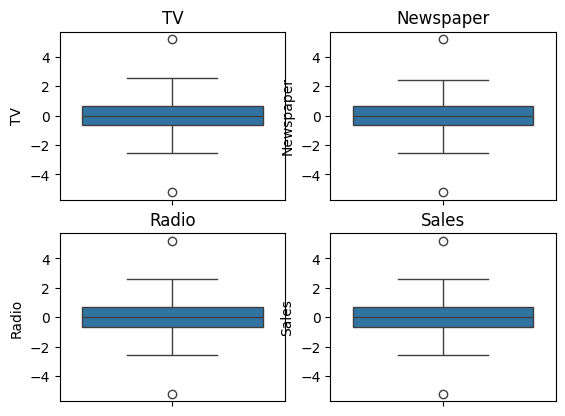

In [ ]:
plt.subplot(2,2,1)
sns.boxplot(data_transformed.TV)
plt.title('TV')

plt.subplot(2,2,2)
sns.boxplot(data_transformed.Newspaper)
plt.title('Newspaper')

plt.subplot(2,2,3)
sns.boxplot(data_transformed.Radio)
plt.title('Radio')

plt.subplot(2,2,4)
sns.boxplot(data_transformed.Sales)
plt.title('Sales')

In [ ]:
!pip install feature_engine

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='TV'>

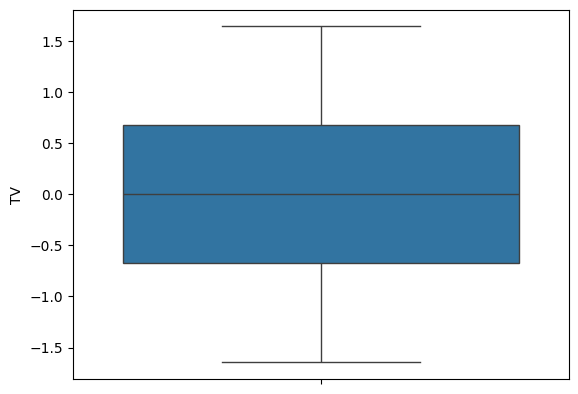

In [ ]:
from feature_engine.outliers import Winsorizer
winsor_percentile = Winsorizer(capping_method = 'quantiles',
                          tail = 'both', # cap left, right or both tails
                          fold = 0.05, # limits will be the 5th and 95th percentiles
                          variables = ['TV'])
data_transformed['TV'] = winsor_percentile.fit_transform(data_transformed[['TV']])

sns.boxplot(data_transformed.TV)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Newspaper'>

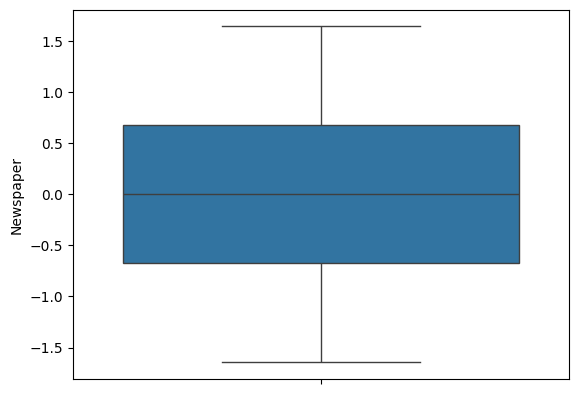

In [ ]:
winsor_percentile = Winsorizer(capping_method = 'quantiles',
                          tail = 'both', # cap left, right or both tails
                          fold = 0.05, # limits will be the 5th and 95th percentiles
                          variables = ['Newspaper'])
data_transformed['Newspaper']=winsor_percentile.fit_transform(data_transformed[['Newspaper']])

sns.boxplot(data_transformed.Newspaper)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Radio'>

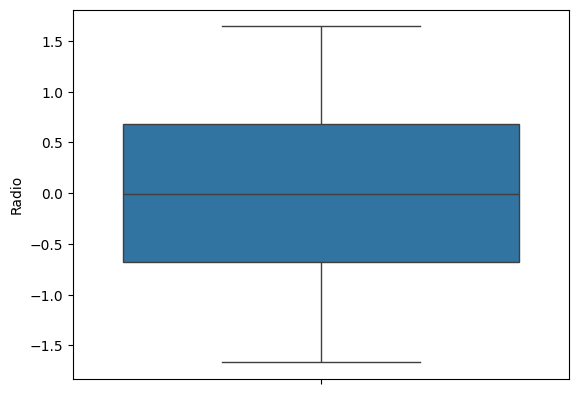

In [ ]:
winsor_percentile = Winsorizer(capping_method = 'quantiles',
                          tail = 'both', # cap left, right or both tails
                          fold = 0.05, # limits will be the 5th and 95th percentiles
                          variables = ['Radio'])
data_transformed['Radio'] = winsor_percentile.fit_transform(data_transformed[['Radio']])

sns.boxplot(data_transformed.Radio)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Sales'>

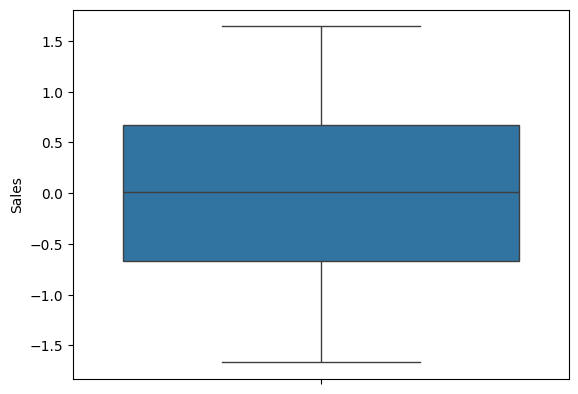

In [ ]:
winsor_percentile = Winsorizer(capping_method = 'quantiles',
                          tail = 'both', # cap left, right or both tails
                          fold = 0.05, # limits will be the 5th and 95th percentiles
                          variables = ['Sales'])
data_transformed['Sales'] = winsor_percentile.fit_transform(data_transformed[['Sales']])

sns.boxplot(data_transformed.Sales)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


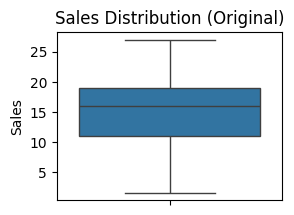

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


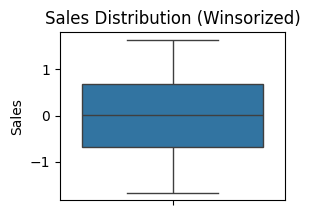

In [ ]:
# Create boxplots for original and transformed data
plt.subplot(2,2,1)
sns.boxplot(data['Sales'])
plt.title('Sales Distribution (Original)')
plt.show()
plt.subplot(2,2,2)
sns.boxplot(data_transformed.Sales)
plt.title('Sales Distribution (Winsorized)')
plt.show()

In [ ]:


# Assuming you have your data in 'df' and transformed data in 'data_transformed'

# Calculate correlation coefficients for original data
original_corr = data['Sales'].corr(data['Newspaper'])  # Replace 'another_variable' with the actual column name

# Calculate correlation coefficients for transformed data
transformed_corr = data_transformed.Sales.corr(data_transformed['Newspaper'])

# Print the correlation coefficients
print("Original Correlation:", original_corr)
print("Transformed Correlation:", transformed_corr)

# Calculate the difference in correlation coefficients
corr_difference = abs(original_corr - transformed_corr)

# Optional: Perform a statistical test for significant difference (e.g., Fisher's z-transformation)

print("Absolute Difference in Correlation:", corr_difference)

# Interpretation
if corr_difference > 0.1:  # Adjust threshold based on your significance level
    print("There might be a significant change in correlation after winsorization.")
else:
    print("The change in correlation seems minimal.")


Original Correlation: 0.15796002615492624
Transformed Correlation: 0.36520846540058677
Absolute Difference in Correlation: 0.20724843924566053
There might be a significant change in correlation after winsorization.


In [ ]:
import pandas as pd

# Assuming you have your data in 'df' and transformed data in 'data_transformed'

# Calculate correlation coefficients for original data
original_corr = data['Sales'].corr(data['TV'])  # Replace 'another_variable' with the actual column name

# Calculate correlation coefficients for transformed data
transformed_corr = data_transformed.Sales.corr(data_transformed['TV'])

# Print the correlation coefficients
print("Original Correlation:", original_corr)
print("Transformed Correlation:", transformed_corr)

# Calculate the difference in correlation coefficients
corr_difference = abs(original_corr - transformed_corr)

# Optional: Perform a statistical test for significant difference (e.g., Fisher's z-transformation)

print("Absolute Difference in Correlation:", corr_difference)

# Interpretation
if corr_difference > 0.1:  # Adjust threshold based on your significance level
    print("There might be a significant change in correlation after winsorization.")
else:
    print("The change in correlation seems minimal.")

Original Correlation: 0.9077857465621195
Transformed Correlation: 0.8820085965723697
Absolute Difference in Correlation: 0.02577714998974978
The change in correlation seems minimal.


In [ ]:

# Assuming you have your data in 'df' and transformed data in 'data_transformed'

# Calculate correlation coefficients for original data
original_corr = data['Sales'].corr(data['Radio'])  # Replace 'another_variable' with the actual column name

# Calculate correlation coefficients for transformed data
transformed_corr = data_transformed.Sales.corr(data_transformed['Radio'])

# Print the correlation coefficients
print("Original Correlation:", original_corr)
print("Transformed Correlation:", transformed_corr)

# Calculate the difference in correlation coefficients
corr_difference = abs(original_corr - transformed_corr)

# Optional: Perform a statistical test for significant difference (e.g., Fisher's z-transformation)

print("Absolute Difference in Correlation:", corr_difference)

# Interpretation
if corr_difference > 0.1:  # Adjust threshold based on your significance level
    print("There might be a significant change in correlation after winsorization.")
else:
    print("The change in correlation seems minimal.")

Original Correlation: 0.34963109700766937
Transformed Correlation: 0.12408716766002414
Absolute Difference in Correlation: 0.22554392934764522
There might be a significant change in correlation after winsorization.


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.5.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, feature-engine, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
from sklearn.linear_model import LinearRegression


# Assuming you have your data in 'df' and transformed data in 'data_transformed'

# Original data regression
X_original = data[['Newspaper', 'TV', 'Radio']]  # Replace ... with other independent variables
y_original = data['Sales']

model_original = LinearRegression()
model_original.fit(X_original, y_original)

# Extract original model coefficients (slopes and intercept)
original_slope_coef = model_original.coef_
original_intercept = model_original.intercept_

# Transformed data regression
X_transformed = data_transformed[['Sales', 'TV', 'Radio']]  # Replace ... with Winsorized independent variables
y_transformed = data_transformed['Sales']

model_transformed = LinearRegression()
model_transformed.fit(X_transformed, y_transformed)

# Extract transformed model coefficients
transformed_slope_coef = model_transformed.coef_
transformed_intercept = model_transformed.intercept_

# Compare slopes and intercepts (and potentially R-squared, AIC)
slope_dif=original_slope_coef-transformed_slope_coef
intercept_dif=original_intercept-transformed_intercept
# Make interpretations based on the comparisons
print(f"Slope difference after transformation is{slope_dif}")
print(f"intercept difference after transformation is{intercept_dif}")
# Make interpretations based on the comparisons


Slope difference after transformation is[-0.99912732  0.20180372  0.11045447]
intercept difference after transformation is2.826983492817355


In [ ]:
from sklearn.model_selection import train_test_split
x=data_transformed.iloc[:,:-1]
y=data_transformed["Sales"]
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state= 42)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lm = LinearRegression()
# Train the model using training data sets
lm.fit(X_train,y_train)
# Predict on the test data
y_pred =lm.predict(X_test)
score=r2_score(y_test,y_pred)
score


0.8869693374506054

Key aspects of EDA include:

Distribution of Data: Examining the distribution of data points to understand their range, central tendencies (mean, median), and dispersion (variance, standard deviation).

Graphical Representations: Utilizing charts such as histograms, box plots, scatter plots, and bar charts to visualize relationships within the data and distributions of variables.

Outlier Detection: Identifying unusual values that deviate from other data points. Outliers can influence statistical analyses and might indicate data entry errors or unique cases.

Correlation Analysis: Checking the relationships between variables to understand how they might affect each other. This includes computing correlation coefficients and creating correlation matrices.

Handling Missing Values: Detecting and deciding how to address missing data points, whether by imputation or removal, depending on their impact and the amount of missing data.

Summary Statistics: Calculating key statistics that provide insight into data trends and nuances.

Testing Assumptions: Many statistical tests and models assume the data meet certain conditions (like normality or homoscedasticity). EDA helps verify these assumptions.

Limitations:

This data only captures advertising expenditure on three specific media channels. Other marketing activities or external factors might also influence sales.
The data doesn't provide information about the effectiveness of each advertising channel compared to the others.
It's challenging to establish causality. Just because there's a correlation doesn't necessarily mean that advertising expenditure directly causes higher sales. There might be other factors at play.